In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

tf.__version__

'2.14.1'

# 01. Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

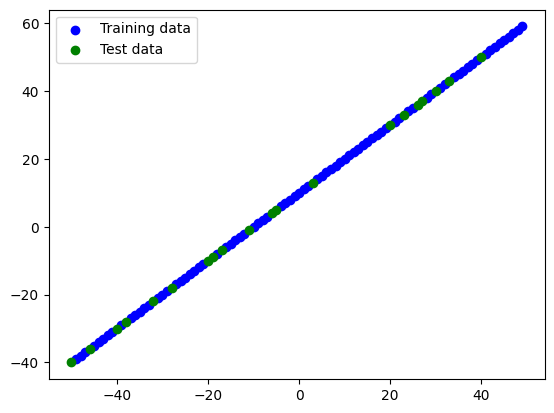

In [2]:
X = np.arange(100) - 50
y = X + 10
X_train, X_test, y_train, y_test = train_test_split(X[:], y[:], test_size=.2, random_state=42)
plt.figure()
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend()

In [3]:
# Set seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit a model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 37.0041 - mae: 37.0041
Epoch 2/10
3/3 [==============================] - 0s 1ms/step - loss: 20.0162 - mae: 20.0162
Epoch 3/10
3/3 [==============================] - 0s 1ms/step - loss: 10.3555 - mae: 10.3555
Epoch 4/10
3/3 [==============================] - 0s 1ms/step - loss: 10.0732 - mae: 10.0732
Epoch 5/10
3/3 [==============================] - 0s 1ms/step - loss: 10.0527 - mae: 10.0527
Epoch 6/10
3/3 [==============================] - 0s 1ms/step - loss: 10.0600 - mae: 10.0600
Epoch 7/10
3/3 [==============================] - 0s 1ms/step - loss: 9.9907 - mae: 9.9907
Epoch 8/10
3/3 [==============================] - 0s 1ms/step - loss: 9.9698 - mae: 9.9698
Epoch 9/10
3/3 [==============================] - 0s 1ms/step - loss: 9.7779 - mae: 9.7779
Epoch 10/10
3/3 [==============================] - 0s 1ms/step - loss: 9.9339 - mae: 9.9339


In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 77ms/step - loss: 10.0376 - mae: 10.0376


[10.037552833557129, 10.037552833557129]

### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [6]:
# Set seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit a model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 10.2318 - mae: 10.2318
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 10.0694 - mae: 10.0694
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 10.0105 - mae: 10.0105
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 10.0221 - mae: 10.0221
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 9.8858 - mae: 9.8858
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 9.8306 - mae: 9.8306
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 9.8220 - mae: 9.8220
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 9.7366 - mae: 9.7366
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 9.6863 - mae: 9.6863
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 9.6360 - mae: 9.6360


1/1 [==============================] - 0s 38ms/step


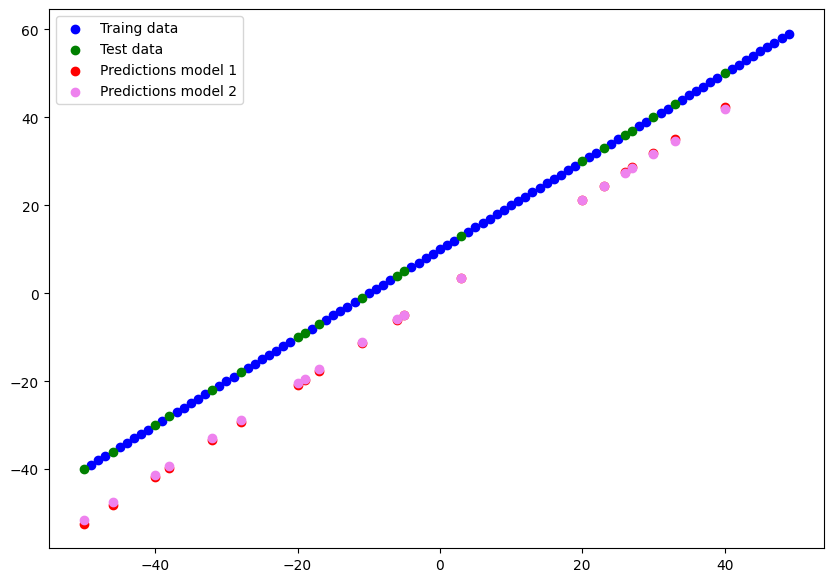

In [7]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="Traing data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.scatter(X_test, model_1.predict(X_test), c="r", label="Predictions model 1")
plt.scatter(X_test, model_2.predict(X_test), c="violet", label="Predictions model 2")

plt.legend()

on 10 epochs `model_2` performance is worse than `model_1`,
lets try to compare history graphs of 200 epochs each

In [8]:
his1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
his2 = model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 13ms/step


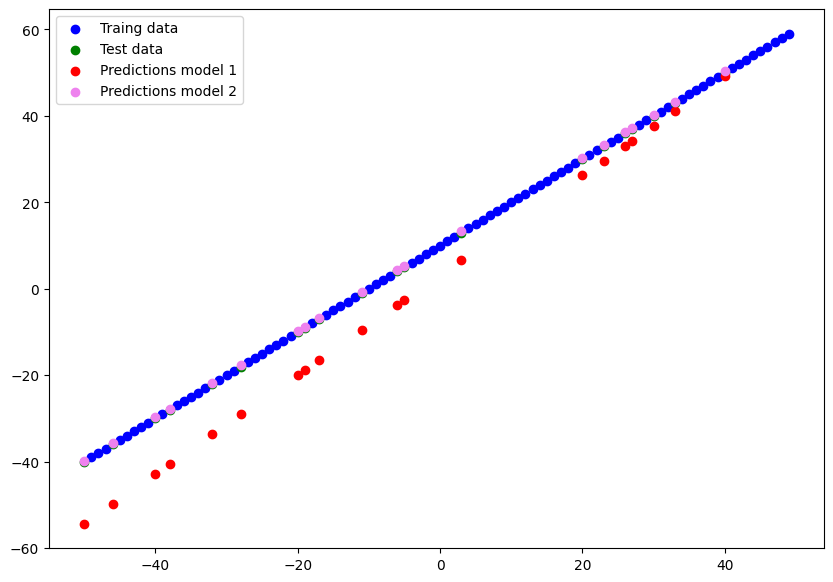

In [9]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="Traing data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.scatter(X_test, model_1.predict(X_test), c="r", label="Predictions model 1")
plt.scatter(X_test, model_2.predict(X_test), c="violet", label="Predictions model 2")

plt.legend()

### 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 

In [10]:
# This is what we are trying to beat
# Layer (type)                Output Shape              Param #   
#=================================================================
# dense_24 (Dense)            (None, 100)               1200      
#                                                                 
# dense_25 (Dense)            (None, 10)                1010      
#                                                                 
# dense_26 (Dense)            (None, 1)                 11        
                                                                 

# 9/9 [==============================] - 0s 870us/step - loss: 3438.5100 - mae: 3438.5100
# [3438.510009765625, 3438.510009765625]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMxScaler) and OneHotEcoder
X_train_normal = ct.transform(X_train)
X_test_normal =  ct.transform(X_test)

In [13]:
# Create model
# Set seed
tf.random.set_seed(42)

# Create model with 4 layers
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile model
model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
history_model_3 = model_3.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [14]:
model_3.evaluate(X_test_normal, y_test)
# Old model
# [3438.510009765625, 3438.510009765625]

9/9 [==============================] - 0s 890us/step - loss: 3170.7974 - mae: 3170.7974


[3170.79736328125, 3170.79736328125]

In [15]:
# Increasing the number of units in each layer.
# Set seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

# Compile model
model_4.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
history_model_4 = model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [16]:
model_4.evaluate(X_test_normal, y_test)
# Old model
# [3438.510009765625, 3438.510009765625]
# model_3
# [3161.261474609375, 3161.261474609375]

9/9 [==============================] - 0s 967us/step - loss: 3172.5559 - mae: 3172.5559


[3172.555908203125, 3172.555908203125]

In [17]:
# Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?

# Set seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

# Compile model
model_5.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit model
history_model_5 = model_5.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [18]:
model_5.evaluate(X_test_normal, y_test)
# Old model
# [3438.510009765625, 3438.510009765625]
# model_3
# [3161.261474609375, 3161.261474609375]
# model_4
# [3156.919677734375, 3156.919677734375]
# model_5

9/9 [==============================] - 0s 891us/step - loss: 3216.2874 - mae: 3216.2874


[3216.287353515625, 3216.287353515625]

In [19]:
# What happens if you train for longer (say 300 epochs instead of 200)?

# Set seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

# Compile model
model_6.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit model
history_model_6 = model_6.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [20]:
model_6.evaluate(X_test_normal, y_test)
# Old model
# [3438.510009765625, 3438.510009765625]
# model_3
# [3161.261474609375, 3161.261474609375]
# model_4
# [3156.919677734375, 3156.919677734375]
# model_5
# [3197.523681640625, 3197.523681640625]
# model_6

9/9 [==============================] - 0s 964us/step - loss: 3253.6072 - mae: 3253.6072


[3253.607177734375, 3253.607177734375]

Text(0, 0.5, 'Epochs')

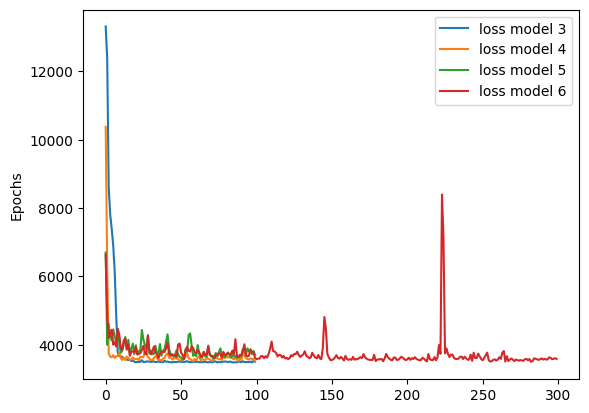

In [21]:
his3 = history_model_3.history.copy()
his3.pop("mae")
his3["loss model 3"] = his3.pop("loss")

his4 = history_model_4.history.copy()
his4.pop("mae")
his4["loss model 4"] = his4.pop("loss")

his5 = history_model_5.history.copy()
his5.pop("mae")
his5["loss model 5"] = his5.pop("loss")

his6 = history_model_6.history.copy()
his6.pop("mae")
his6["loss model 6"] = his6.pop("loss")

pd.concat([
    pd.DataFrame(his3),
    pd.DataFrame(his4),
    pd.DataFrame(his5),
    pd.DataFrame(his6),
]).plot()
plt.ylabel("Loss")
plt.ylabel("Epochs")

### 4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz',
    test_split=0.2,
    seed=42
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [23]:
# Set seedd
tf.random.set_seed(42)

# Create model
boston_housing_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

# Compile model
boston_housing_model.compile(loss="mae",
                             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             metrics=["mae"])

# Fit the model
boston_housing_history = boston_housing_model.fit(X_train, y_train, epochs=200, verbose=0)

In [24]:
boston_housing_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 4.0931 - mae: 4.0931


[4.093116760253906, 4.093116760253906]

Text(0.5, 0, 'Epochs')

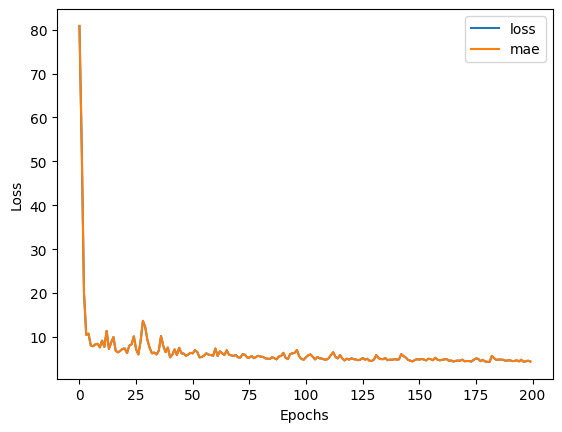

In [25]:
pd.DataFrame(boston_housing_history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

### 📖 01. Neural network regression with TensorFlow Extra-curriculum

* [MIT introduction deep learning lecture 1](https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.